# Baseline model
Training Naive Bayes on the data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

games = pd.read_csv("prev_year_team_attr_by_game.csv", index_col=0)


In [2]:
games.head()

,game_id,game_date,t1_gp,t1_minutes,t1_pts,t1_oreb,t1_dreb,t1_reb,t1_asts,t1_stl,...,t2_pf,t2_fga,t2_fgm,t2_fta,t2_ftm,t2_tpa,t2_tpm,t1_team_ilkid,t2_team_ilkid,winner
0,29600012,1996-11-01 00:00:00,65.714286,26.708571,12.471429,1.218571,3.295714,4.515714,3.007143,0.902857,...,2.435000,9.271250,4.191250,2.415000,1.811250,2.342500,0.837500,"['JONESED01', 'SCOTTBY01', 'ROBINRU01', 'BLOUN...","['MANNIDA01', 'KLEINJO01', 'CHAPMRE01', 'HORRY...",0
1,29600027,1996-11-03 00:00:00,69.500000,28.388333,13.593333,1.348333,3.616667,4.966667,2.958333,0.953333,...,2.292500,7.225000,3.277500,2.331250,1.781250,1.183750,0.368750,"['JONESED01', 'SCOTTBY01', 'BLOUNCO01', 'ONEAS...","['MITCHSA01', 'GARNEKE01', 'CARRCH01', 'PARKSC...",0
2,29600044,1996-11-06 00:00:00,69.500000,28.388333,13.593333,1.348333,3.616667,4.966667,2.958333,0.953333,...,2.917143,8.395714,4.090000,2.724286,1.991429,1.737143,0.674286,"['JONESED01', 'SCOTTBY01', 'BLOUNCO01', 'ONEAS...","['MASONAN01', 'BURRESC01', 'ZIDEKGE01', 'GOLDW...",1
3,29600057,1996-11-08 00:00:00,69.500000,28.388333,13.593333,1.348333,3.616667,4.966667,2.958333,0.953333,...,2.876000,8.626000,4.048667,2.883333,1.999333,1.483333,0.618667,"['JONESED01', 'SCOTTBY01', 'BLOUNCO01', 'ONEAS...","['JONESPO01', 'WILLIWA01', 'WILLIWA01', 'WILLI...",1
4,29600072,1996-11-10 00:00:00,72.000000,31.558000,15.670000,1.376000,3.986000,5.364000,3.402000,1.056000,...,2.635556,8.333333,3.866667,3.110000,2.473333,1.258889,0.441111,"['JONESED01', 'SCOTTBY01', 'ONEASH01', 'VANEXN...","['LAETTCH01', 'LAETTCH01', 'LAETTCH01', 'BLAYL...",0


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9953
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        9954 non-null   int64  
 1   game_date      9954 non-null   object 
 2   t1_gp          9954 non-null   float64
 3   t1_minutes     9954 non-null   float64
 4   t1_pts         9954 non-null   float64
 5   t1_oreb        9954 non-null   float64
 6   t1_dreb        9954 non-null   float64
 7   t1_reb         9954 non-null   float64
 8   t1_asts        9954 non-null   float64
 9   t1_stl         9954 non-null   float64
 10  t1_blk         9954 non-null   float64
 11  t1_turnover    9954 non-null   float64
 12  t1_pf          9954 non-null   float64
 13  t1_fga         9954 non-null   float64
 14  t1_fgm         9954 non-null   float64
 15  t1_fta         9954 non-null   float64
 16  t1_ftm         9954 non-null   float64
 17  t1_tpa         9954 non-null   float64
 18  t1_tpm       

In [4]:
games.describe()

,game_id,t1_gp,t1_minutes,t1_pts,t1_oreb,t1_dreb,t1_reb,t1_asts,t1_stl,t1_blk,...,t2_blk,t2_turnover,t2_pf,t2_fga,t2_fgm,t2_fta,t2_ftm,t2_tpa,t2_tpm,winner
count,9.954000e+03,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,...,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
mean,2.500450e+07,59.598595,24.277207,9.603510,1.200468,2.994740,4.195322,2.263167,0.806521,0.502251,...,0.481708,1.454479,2.182021,7.891602,3.512753,2.475997,1.845882,1.394915,0.487261,0.468154
std,6.303103e+06,11.038667,3.246200,1.768220,0.268663,0.564476,0.770693,0.569241,0.162402,0.181738,...,0.164128,0.257297,0.265988,1.457633,0.677482,0.523983,0.405675,0.545434,0.207773,0.499010
min,2.000000e+07,24.800000,13.666250,4.427273,0.395556,1.275556,1.673333,0.636000,0.363333,0.114444,...,0.112500,0.461667,0.953333,2.275000,0.826667,0.787143,0.505556,0.000000,0.000000,0.000000
25%,2.020046e+07,52.777778,22.054850,8.360250,1.023636,2.613409,3.673529,1.882500,0.697143,0.373019,...,0.368571,1.279464,2.010833,6.901146,3.072500,2.110000,1.573245,0.990855,0.332667,0.000000
50%,2.040090e+07,61.666667,24.208194,9.507778,1.182727,2.969226,4.154000,2.229091,0.788750,0.476364,...,0.467000,1.441429,2.180000,7.791528,3.465000,2.453750,1.833095,1.320455,0.457101,0.000000
75%,2.970081e+07,68.000000,26.335714,10.752431,1.352000,3.342601,4.656116,2.581349,0.900000,0.600000,...,0.570000,1.613182,2.348304,8.773333,3.920000,2.810000,2.098705,1.742167,0.615000,1.000000
max,4.980009e+07,80.800000,37.378750,23.580000,2.723750,7.098889,9.516667,6.740000,1.530000,1.681111,...,1.487500,2.978571,3.052000,18.105714,7.606250,6.187500,4.967500,4.257500,1.692500,1.000000


<Axes: >

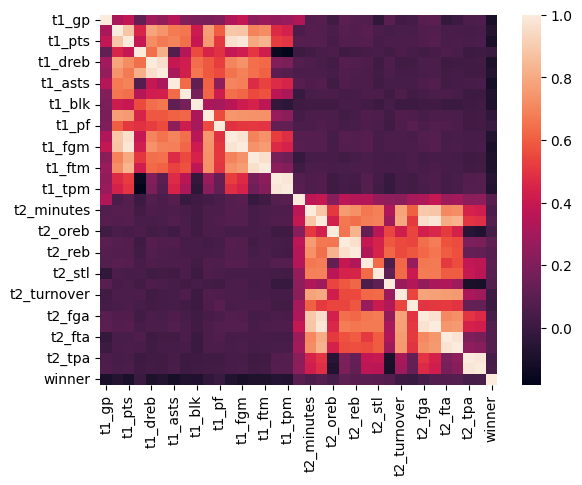

In [5]:
import seaborn as sns
x = games.drop(columns=['game_date','game_id', 't1_team_ilkid', 't2_team_ilkid'])
sns.heatmap(x.corr('spearman'))

In [6]:
X = games[games.columns[2:-3]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

y = games[games.columns[-1]]

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=150, activation='tanh', verbose=True, alpha=0.001)
clf = clf.fit(X_train, y_train)



Iteration 1, loss = 0.67940206
Iteration 2, loss = 0.64974977
Iteration 3, loss = 0.64546878
Iteration 4, loss = 0.64407370
Iteration 5, loss = 0.64330269
Iteration 6, loss = 0.64019046
Iteration 7, loss = 0.63988535
Iteration 8, loss = 0.63818901
Iteration 9, loss = 0.63821524
Iteration 10, loss = 0.63914325
Iteration 11, loss = 0.63502457
Iteration 12, loss = 0.63392849
Iteration 13, loss = 0.63454569
Iteration 14, loss = 0.63232946
Iteration 15, loss = 0.63441525
Iteration 16, loss = 0.63152068
Iteration 17, loss = 0.63115494
Iteration 18, loss = 0.63247007
Iteration 19, loss = 0.63018186
Iteration 20, loss = 0.63052259
Iteration 21, loss = 0.63032150
Iteration 22, loss = 0.62793161
Iteration 23, loss = 0.62833607
Iteration 24, loss = 0.62693274
Iteration 25, loss = 0.62696271
Iteration 26, loss = 0.62521785
Iteration 27, loss = 0.62423346
Iteration 28, loss = 0.62479322
Iteration 29, loss = 0.62358188
Iteration 30, loss = 0.62188739
Iteration 31, loss = 0.62203053
Iteration 32, los

C:\Users\swara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
X_train.shape

(7963, 34)

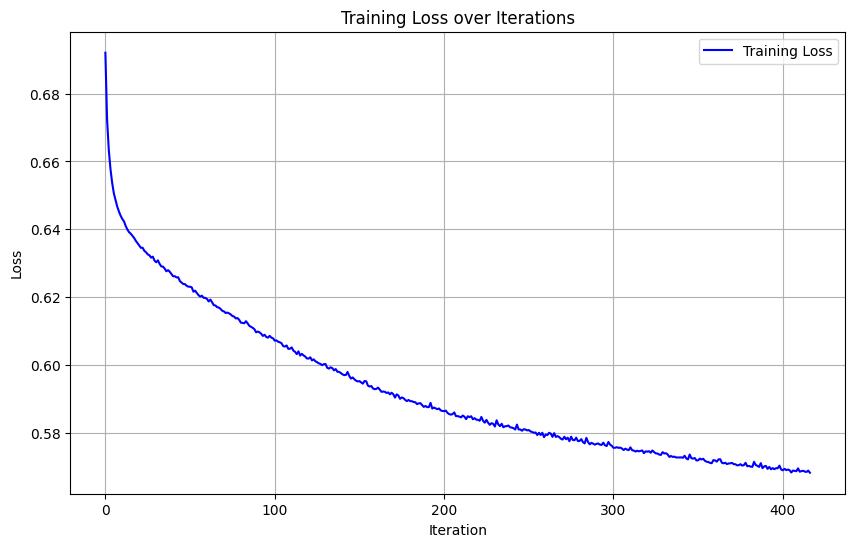

In [14]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = MLPClassifier(random_state=1, max_iter=2000, hidden_layer_sizes=[20], activation='tanh', alpha=0.01)
training_loss = clf.fit(X_train, y_train).loss_curve_

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, color='blue', label='Training Loss')
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
clf.score(X_train, y_train)

0.703629285445184

In [16]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Test Accuracy = ", accuracy)
print(classification_report(y_test,y_pred))

Test Accuracy =  0.6142641888498243
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1063
           1       0.59      0.55      0.57       928

    accuracy                           0.61      1991
   macro avg       0.61      0.61      0.61      1991
weighted avg       0.61      0.61      0.61      1991

